In [1]:
#Import data preprocessing modules
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series, DataFrame
import pandas as pd

# Visualization modules
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# Machine learning module
import sklearn

In [2]:
#Read the file
dataset = pd.read_csv("./input/titanic.csv")

#Show the first 50 rows
dataset.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
#Observe the data shape
dataset.shape

(891, 12)

In [4]:
#Observe the data information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
#Set seaborn as the default drawing library
sns.set()

In [6]:
def bar_chart(feature):
    Survived = dataset[dataset["Survived"] ==1 ][feature].value_counts()
    Dead = dataset[dataset["Survived"] ==0 ][feature].value_counts()
    df = pd.DataFrame([Survived,Dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

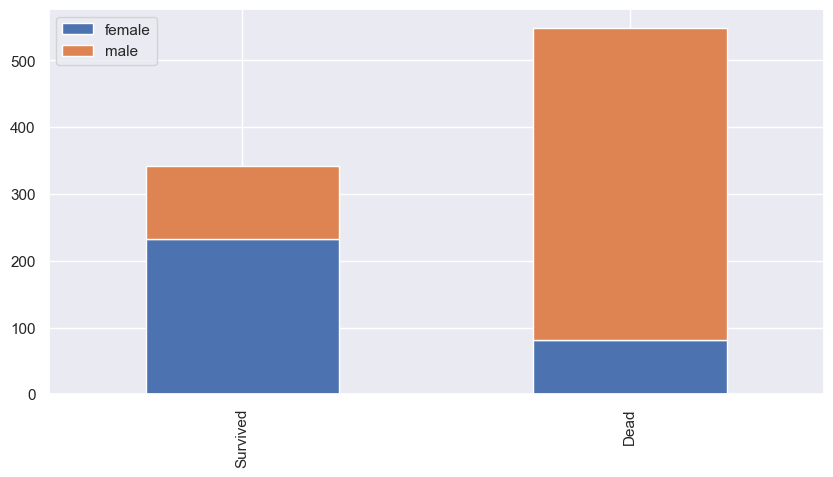

In [7]:
#Bar Chat of Survival/Dead Men and Women
bar_chart("Sex")

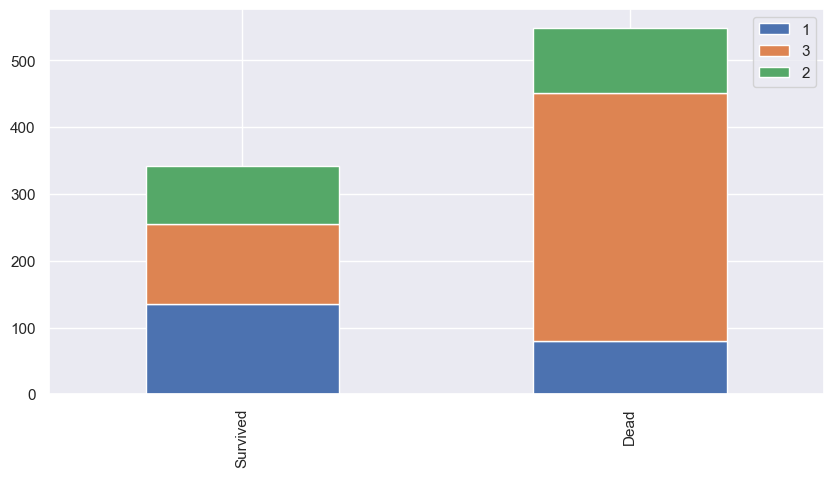

In [8]:
#Bar Chat of the Cabin of the Survival/Dead Person
bar_chart("Pclass")

In [9]:
#Calculate the number of “NaN” in the columns 
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Name

In [10]:
#Observe the Name column
dataset['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [11]:
#Pick out Mr., Mrs., Miss
dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
#https://reurl.cc/qeZQE
#https://reurl.cc/Neb8n

In [12]:
#Count the Number of People by Each Title
dataset['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [13]:
#titlemapping
title_mapping = {"Mr": 0,"Miss": 1,"Mrs":2,"Master":3}
dataset['Title'] = dataset['Title'].map(title_mapping)

In [14]:
#Current dataset
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0


In [15]:
#Current dataframe
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0


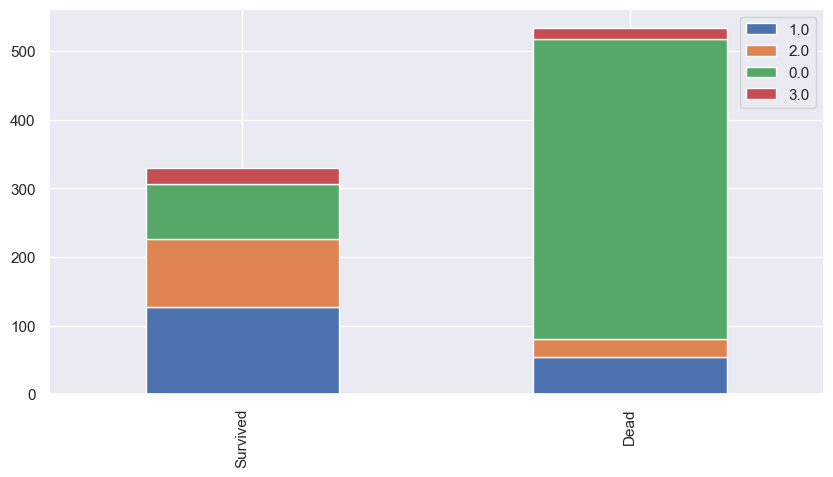

In [16]:
#Show the Distribution of Title/Survival and Dead
bar_chart("Title")

In [17]:
#Delete the "Name" column
dataset.drop('Name',axis=1,inplace=True)

In [18]:
#Current dataframe
dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0.0


# Sex

In [19]:
#mapping sex
sex_mapping = {"male":0,"female":1}
dataset['Sex'] = dataset['Sex'].map(sex_mapping)

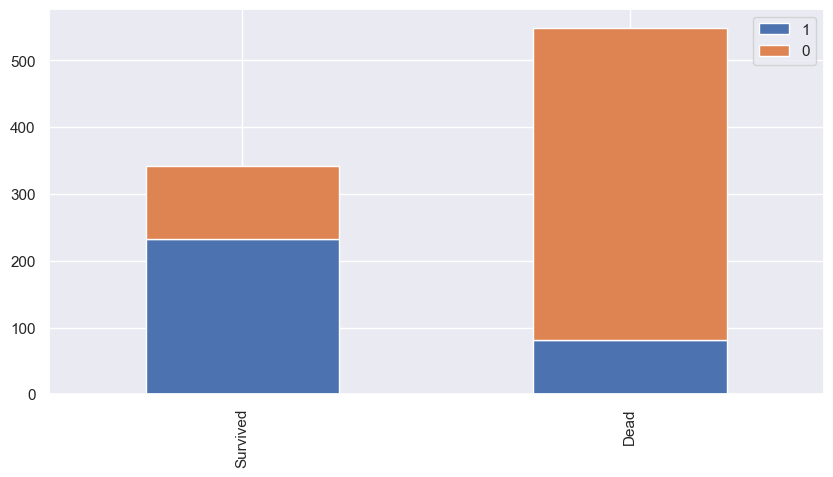

In [20]:
bar_chart('Sex')

In [21]:
#Current dataframe
dataset.head(100)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,3,0,NaN,0,0,374910,8.0500,NaN,S,0.0
96,97,0,1,0,71.0,0,0,PC 17754,34.6542,A5,C,0.0
97,98,1,1,0,23.0,0,1,PC 17759,63.3583,D10 D12,C,0.0
98,99,1,2,1,34.0,0,1,231919,23.0000,NaN,S,2.0


# Age

In [22]:
# fill missing age with median age for each title (Mr, Mrs, Miss, Others)
dataset["Age"].fillna(dataset.groupby("Title")["Age"].transform("median"), inplace = True)
dataset["Age"]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    21.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

c:\Users\User\anaconda3\envs\Py39\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
c:\Users\User\anaconda3\envs\Py39\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\User\anaconda3\envs\Py39\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
c:\Users\User\anaconda3\envs\Py39\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


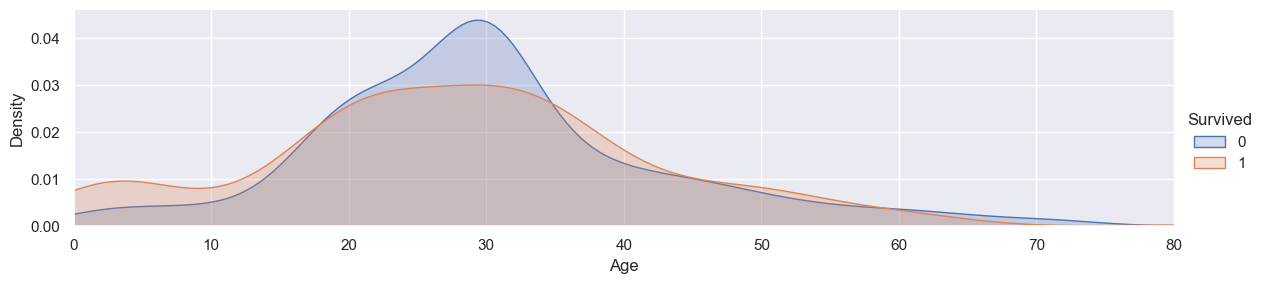

In [23]:
#Distribution of Age/Survival and Death
facet = sns.FacetGrid(dataset, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, dataset['Age'].max()))
facet.add_legend()
 
plt.show()

In [24]:
#Mapping Function According to the Range of Age 
dataset.loc[dataset["Age"] <= 16,'Age'] = 0
dataset.loc[(dataset["Age"] > 16) & (dataset["Age"] <= 26),'Age'] = 1
dataset.loc[(dataset["Age"] > 26) & (dataset["Age"] <= 36),'Age'] = 2
dataset.loc[(dataset["Age"] > 36) & (dataset["Age"] <= 62),'Age'] = 3
dataset.loc[dataset["Age"] > 62,'Age'] = 4

In [25]:
#Current dataframe
dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0.0


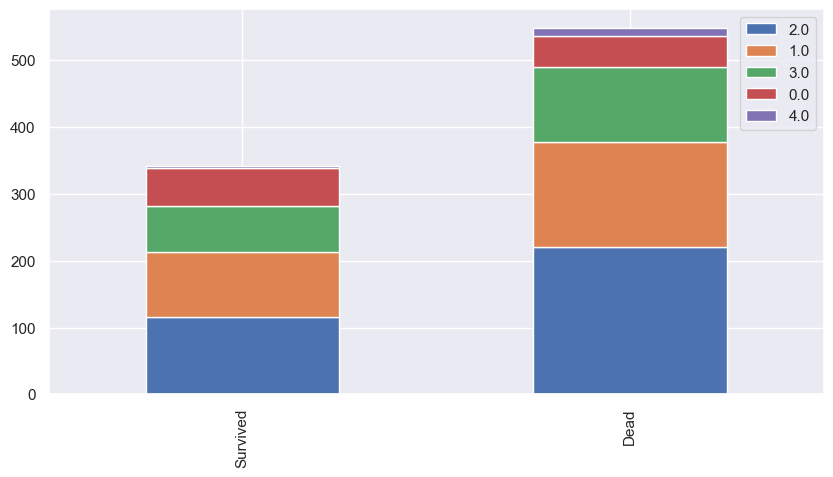

In [26]:
#Bar Chart of Age
bar_chart("Age")

# Embarked (登船地點)

<AxesSubplot: >

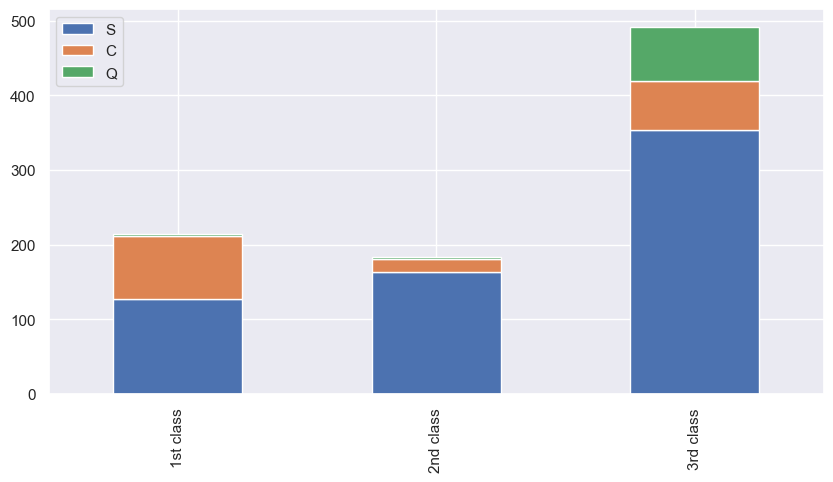

In [27]:
#Analyze the Type of Boarding Tickets at Each Boarding Location
Pclass1 = dataset[dataset['Pclass'] == 1]["Embarked"].value_counts()
Pclass2 = dataset[dataset['Pclass'] == 2]["Embarked"].value_counts()
Pclass3 = dataset[dataset['Pclass'] == 3]["Embarked"].value_counts()
df = pd.DataFrame([Pclass1,Pclass2,Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [28]:
#Fill Missing Value for Embarked Location
dataset["Embarked"] = dataset["Embarked"].fillna('s')
dataset.head(100)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,3,0,2.0,0,0,374910,8.0500,NaN,S,0.0
96,97,0,1,0,4.0,0,0,PC 17754,34.6542,A5,C,0.0
97,98,1,1,0,1.0,0,1,PC 17759,63.3583,D10 D12,C,0.0
98,99,1,2,1,2.0,0,1,231919,23.0000,NaN,S,2.0


In [29]:
#Mapping Function for the Embarked Location
e_mapping = {"S": 0,"C": 1,"Q": 2}
dataset["Embarked"] = dataset["Embarked"].map(e_mapping)
dataset.head(100)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0.0,0.0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1.0,2.0
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0,1.0
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0.0,2.0
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,3,0,2.0,0,0,374910,8.0500,NaN,0.0,0.0
96,97,0,1,0,4.0,0,0,PC 17754,34.6542,A5,1.0,0.0
97,98,1,1,0,1.0,0,1,PC 17759,63.3583,D10 D12,1.0,0.0
98,99,1,2,1,2.0,0,1,231919,23.0000,NaN,0.0,2.0


# Fare(票價)

In [30]:
#Fill in Missing Value for Fares 
dataset["Fare"].fillna(dataset.groupby("Pclass")["Fare"].transform("median"), inplace = True)
dataset.head(50)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0.0,0.0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1.0,2.0
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0,1.0
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0.0,2.0
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0.0,0.0
5,6,0,3,0,2.0,0,0,330877,8.4583,NaN,2.0,0.0
6,7,0,1,0,3.0,0,0,17463,51.8625,E46,0.0,0.0
7,8,0,3,0,0.0,3,1,349909,21.0750,NaN,0.0,3.0
8,9,1,3,1,2.0,0,2,347742,11.1333,NaN,0.0,2.0
9,10,1,2,1,0.0,1,0,237736,30.0708,NaN,1.0,2.0


c:\Users\User\anaconda3\envs\Py39\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
c:\Users\User\anaconda3\envs\Py39\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\User\anaconda3\envs\Py39\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
c:\Users\User\anaconda3\envs\Py39\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


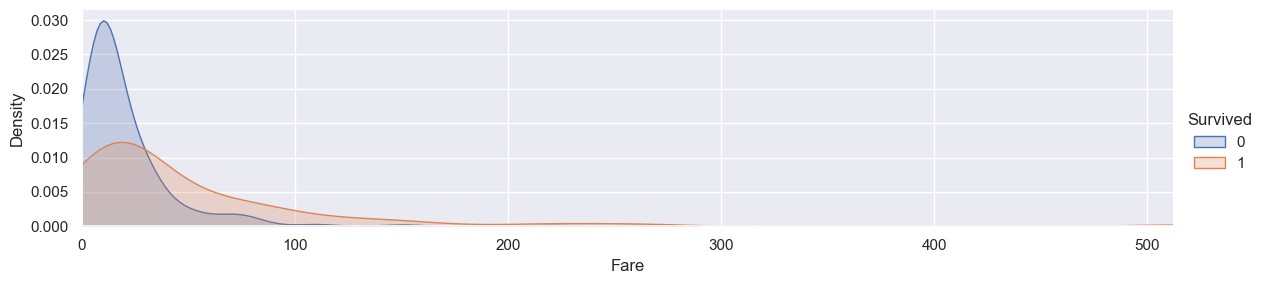

In [31]:
#Distribution of Fare/Survival and Death
facet = sns.FacetGrid(dataset, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, dataset['Fare'].max()))
facet.add_legend()
 
plt.show()

In [32]:
#Mapping Function According to the Range of Fare
dataset.loc[dataset["Fare"] <= 17,'Fare'] = 0
dataset.loc[(dataset["Fare"] > 17) & (dataset["Fare"] <= 30),'Fare'] = 1
dataset.loc[(dataset["Fare"] > 30) & (dataset["Fare"] <= 100),'Fare'] = 2
dataset.loc[dataset["Fare"] > 100 ,'Fare'] = 3

In [33]:
#Current dataframe
dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0.0,0.0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C85,1.0,2.0
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0.0,1.0
3,4,1,1,1,2.0,1,0,113803,2.0,C123,0.0,2.0
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0.0,0.0


In [34]:
#Observe the Cabin Number
dataset["Cabin"].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [35]:
#Observe the Cabin Number =>Take out the first letter
dataset["Cabin"] = dataset["Cabin"].str[:1]
dataset["Cabin"]

0      NaN
1        C
2      NaN
3        C
4      NaN
      ... 
886    NaN
887      B
888    NaN
889      C
890    NaN
Name: Cabin, Length: 891, dtype: object

<AxesSubplot: >

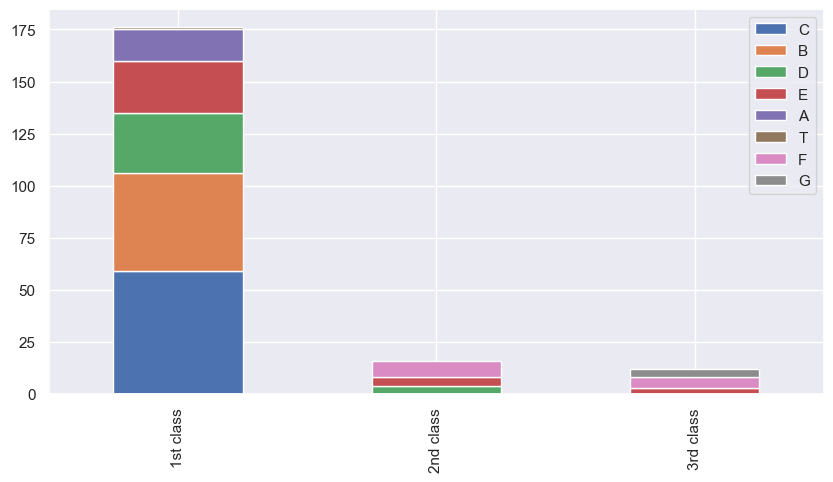

In [36]:
#Analyze the Number of People in Various Ticket Types and Cabin Types
Pclass1 = dataset[dataset['Pclass'] == 1]["Cabin"].value_counts()
Pclass2 = dataset[dataset['Pclass'] == 2]["Cabin"].value_counts()
Pclass3 = dataset[dataset['Pclass'] == 3]["Cabin"].value_counts()
df = pd.DataFrame([Pclass1,Pclass2,Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [37]:
#Cabin Mapping
c_mapping = {"A": 0,"B": 0.4,"C": 0.8,"D": 1.2,"E": 1.6,"F": 2,"G": 2.4,"T": 2.8}
dataset["Cabin"] = dataset["Cabin"].map(c_mapping)

In [38]:
#Fill in the Missing Value on the Type of Cabin
dataset["Cabin"].fillna(dataset.groupby("Pclass")["Cabin"].transform("median"), inplace = True)

In [39]:
#Current dataframe
dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0.0,0.0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1.0,2.0
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0.0,1.0
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0.0,2.0
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0.0,0.0


# Sibsp & Parch

In [40]:
#Combine Sibsp & Parch
dataset["FamilySize"] = dataset["SibSp"] + dataset["Parch"] + 1

c:\Users\User\anaconda3\envs\Py39\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
c:\Users\User\anaconda3\envs\Py39\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\User\anaconda3\envs\Py39\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
c:\Users\User\anaconda3\envs\Py39\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


(0.0, 11.0)

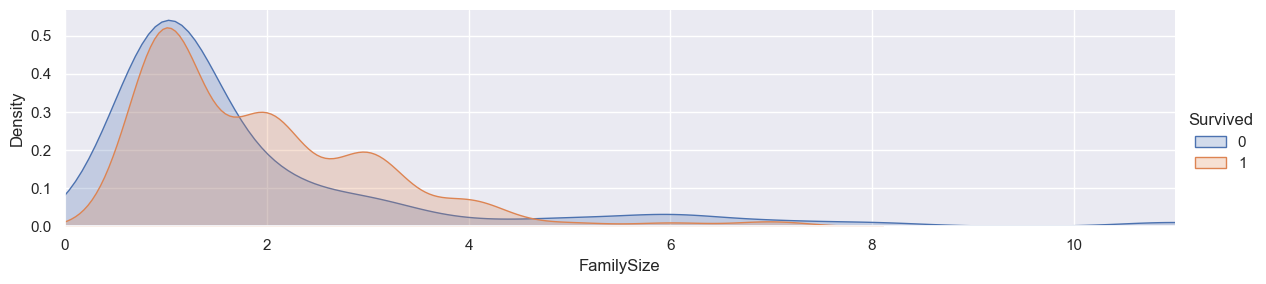

In [41]:
#Distribution of Family Population/Survival and Death
facet = sns.FacetGrid(dataset, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'FamilySize',shade= True)
facet.set(xlim=(0, dataset['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)

In [42]:
#The Mapping Function of Family Population 
f_mapping = {1:0,2:0.4,3:0.8,4:1.2,5:1.6,6:2,7:2.4,8:2.8,9:3.2,10:3.6,11:4}
dataset["FamilySize"] = dataset["FamilySize"].map(f_mapping)

In [43]:
#Current dataframe
dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0.0,0.0,0.4
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1.0,2.0,0.4
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0.0,1.0,0.0
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0.0,2.0,0.4
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0.0,0.0,0.0


# Data Cleaning (資料清洗)

In [44]:
#Delete Sibsp, Parch, Ticket
dataset.drop(['Ticket','SibSp','Parch','PassengerId'],axis=1,inplace=True)

In [45]:
#Set Target Variables and Explanatory Variables
dataset_data = dataset.drop('Survived', axis = 1)
dataset_target = dataset[["Survived"]]
dataset_data.shape, dataset_target.shape

((891, 8), (891, 1))

In [46]:
#All explanatory variables
dataset_data.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,1.0,0.0,2.0,0.0,0.0,0.4
1,1,1,3.0,2.0,0.8,1.0,2.0,0.4
2,3,1,1.0,0.0,2.0,0.0,1.0,0.0
3,1,1,2.0,2.0,0.8,0.0,2.0,0.4
4,3,0,2.0,0.0,2.0,0.0,0.0,0.0


In [47]:
#Check the types of every column in the training data.
#They should be numeric type.
dataset_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      891 non-null    int64  
 1   Sex         891 non-null    int64  
 2   Age         890 non-null    float64
 3   Fare        891 non-null    float64
 4   Cabin       891 non-null    float64
 5   Embarked    889 non-null    float64
 6   Title       864 non-null    float64
 7   FamilySize  891 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 55.8 KB


# Build the model-DNN

In [48]:
#Install Keras and Sklearn
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import Adam
from sklearn import preprocessing
from tensorflow import keras

In [49]:
#Create Model Function
def build_model():
    model = Sequential()
    model.add(Dense(input_dim=8,units=40))
    model.add(Activation('relu'))
    model.add(Dense(units= 100))
    model.add(Activation('relu'))
    model.add(Dense(units= 10))
    model.add(Activation('relu'))
    model.add(Dense(units= 1))
    model.add(Activation('sigmoid'))
    model.summary()
    return model
#Write the code

In [50]:
#Create a Drawing Function
def show_train_history(train_history,train,validation,label):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(label)
    plt.xlabel('Epoch')
    plt.legend(['train','validation'],loc='upper left')
    plt.show()

In [51]:
#Feature Normalization
minmax_scale = preprocessing.MinMaxScaler(feature_range=(0,1))
scaledFeatures=minmax_scale.fit_transform(dataset_data)

In [52]:
#Train Model
model = build_model()

model.compile(loss="binary_crossentropy",optimizer="adam",metrics=['acc'])
train_history = model.fit(x=scaledFeatures,y=dataset_target,validation_split=0.2,batch_size=30,epochs=40)

#Evaluate training result
score = model.evaluate(x=scaledFeatures,y=dataset_target)
print('\nTrain Loss:',score[0])
print ('\nTrain Acc:', score[1])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 40)                360       
                                                                 
 activation (Activation)     (None, 40)                0         
                                                                 
 dense_1 (Dense)             (None, 100)               4100      
                                                                 
 activation_1 (Activation)   (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
 activation_2 (Activation)   (None, 10)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 1

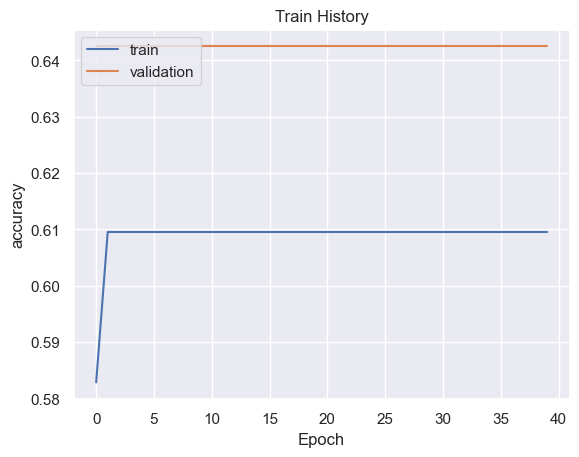

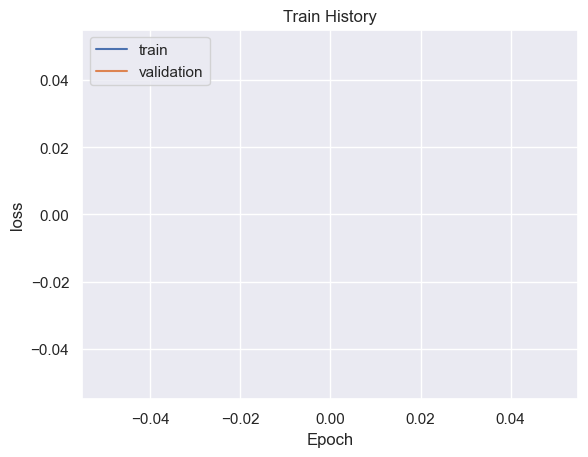

In [53]:
#Show Training Process
show_train_history(train_history,'acc','val_acc','accuracy')
show_train_history(train_history,'loss','val_loss','loss')

# Test Model

In [54]:
#Preprocess the test data in the same way as the training data.

In [55]:
#USe model.predict to predict the probability of survival
#Write the code

In [56]:
#Obtain the weights of the model
#Write the code

In [57]:
#Save the model
#Write the code